# Capstone Project - The Battle of Neighbourhoods

For this project we will analyze the cultural makeup of restaurants in Toronto. We will group neighbourhoods based on their similarity to each other in regards to their dining venues and assign a label to each of them based on their defining features

In [1]:
import pandas as pd

### Location Data

Lets obtain the location data created in the previous project from github

In [2]:
url = 'https://raw.githubusercontent.com/Ayy753/Coursera_Capstone/main/toronto_location_data.csv'
df_locations = pd.read_csv(url, index_col=0)
df_locations

,Borough,Neighbourhood,Latitude,Longitude
Postal Code,,,,
M3A,North York,Parkwoods,43.75245,-79.32991
M4A,North York,Victoria Village,43.73057,-79.31306
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
...,...,...,...,...
M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544


### Using FourSquare API

The FourSquare service allows for searching for venues in each area based on several criteria. We will use it to gather all the venues within 1km of the center of each group of neighbourhoods defined by their postal codes

In [3]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment if not installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

My API credentials are hidden below

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
search_radius = 1000

Lets create an API request url for restaurants. The foursquare API uses IDs as venue search criteria as listed here: https://developer.foursquare.com/docs/build-with-foursquare/categories/

Then we will test it with a random coordinate from Toronto

In [6]:
categoryId = '4d4b7105d754a06374d81259' # the ID of food venues
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, 43.75245, -79.32991, categoryId, VERSION, 500)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fdff7d1d358eb7acac8c835'},
 'response': {'venues': [{'id': '4e6696b6d16433b9ffff47c3',
    'name': 'KFC',
    'location': {'lat': 43.75438666345904,
     'lng': -79.3330206627504,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.75438666345904,
       'lng': -79.3330206627504}],
     'distance': 330,
     'cc': 'CA',
     'country': 'Canada',
     'formattedAddress': ['Canada']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1608513489',
    'hasPerk': False},
   {'id': '4bda3d363904a59320d5459e',
    'name': 'Joey',
    'location': {'lat': 43.753441,
     'lng': -79.32164,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.753441,
       'lng': -79.321

Now lets create a function to parse this JSON data

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}'.format(
            CLIENT_ID, CLIENT_SECRET, lat, lng, categoryId, VERSION, 500)
            
        # make the GET request
        results = requests.get(url).json()
        
        # append each venue to 2d list (each iteration of this forloop creates a new row in the list)
        for v in results["response"]['venues']:
            #print(v['categories'][0]['name'] )
            venues_list.append([
                # Toronto location data
                name, lat, lng, 

                # Foursquare data
                v['name'],
                v['location']['lat'],
                v['location']['lng'],
                v['categories'][0]['name'] 
            ])                
            
    # convert list into dataframe
    venue_df = pd.DataFrame.from_records(venues_list)
    venue_df.columns = ['Neighborhood', 
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']

    return(venue_df)

Lets run it

In [8]:
toronto_venues = getNearbyVenues(names = df_locations['Neighbourhood'], latitudes = df_locations['Latitude'],longitudes = df_locations['Longitude'], radius = search_radius)
toronto_venues.head(25)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.75245,-79.32991,Joey,43.753441,-79.321640,Burger Joint
2,Victoria Village,43.73057,-79.31306,Pizza Nova,43.725824,-79.312860,Pizza Place
3,Victoria Village,43.73057,-79.31306,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.73057,-79.31306,Stellar's Lenonade Stand,43.731507,-79.311712,Food Stand
5,Victoria Village,43.73057,-79.31306,Grill Plate,43.731446,-79.305724,Asian Restaurant
6,Victoria Village,43.73057,-79.31306,Vinnia Meats,43.730465,-79.307520,German Restaurant
7,Victoria Village,43.73057,-79.31306,The Frig,43.727051,-79.317418,French Restaurant
8,"Regent Park, Harbourfront",43.65512,-79.36264,Tandem Coffee,43.653559,-79.361809,Coffee Shop
9,"Regent Park, Harbourfront",43.65512,-79.36264,Roselle Desserts,43.653447,-79.362017,Bakery


### Preprocessing

Remove venues that aren't restaurants, or are listed as just "Restaurant" or "Fast food"

In [9]:
toronto_venues = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")]
toronto_venues = toronto_venues[toronto_venues['Venue Category'] != "Fast Food Restaurant"]
toronto_venues = toronto_venues[toronto_venues['Venue Category'] != 'Restaurant']
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Victoria Village,43.73057,-79.31306,Portugril,43.725819,-79.312785,Portuguese Restaurant
5,Victoria Village,43.73057,-79.31306,Grill Plate,43.731446,-79.305724,Asian Restaurant
6,Victoria Village,43.73057,-79.31306,Vinnia Meats,43.730465,-79.307520,German Restaurant
7,Victoria Village,43.73057,-79.31306,The Frig,43.727051,-79.317418,French Restaurant
10,"Regent Park, Harbourfront",43.65512,-79.36264,Souvlaki Express,43.655584,-79.364438,Greek Restaurant


Lets see the types of restaurants we've gathered

In [10]:
toronto_venues['Venue Category'].unique()

array(['Portuguese Restaurant', 'Asian Restaurant', 'German Restaurant',
       'French Restaurant', 'Greek Restaurant', 'Sushi Restaurant',
       'Mediterranean Restaurant', 'Italian Restaurant',
       'Thai Restaurant', 'Chinese Restaurant', 'American Restaurant',
       'Vegetarian / Vegan Restaurant', 'Mexican Restaurant',
       'Caribbean Restaurant', 'Indian Restaurant', 'Ramen Restaurant',
       'Tapas Restaurant', 'Japanese Restaurant', 'Arepa Restaurant',
       'Latin American Restaurant', 'Filipino Restaurant',
       'Middle Eastern Restaurant', 'Cuban Restaurant',
       'Dim Sum Restaurant', 'Halal Restaurant', 'Seafood Restaurant',
       'Syrian Restaurant', 'New American Restaurant',
       'Belgian Restaurant', 'Korean BBQ Restaurant',
       'Gluten-free Restaurant', 'Peking Duck Restaurant',
       'Ethiopian Restaurant', 'Korean Restaurant',
       'South American Restaurant', 'Vietnamese Restaurant',
       'Hakka Restaurant', 'African Restaurant', 'Falafel Re

We can remove the word "restaurant" from the filtered categories to eliminate redundancy

In [11]:
toronto_venues['Venue Category'] = toronto_venues['Venue Category'].str.split(' Restaurant').str.get(0)
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Victoria Village,43.73057,-79.31306,Portugril,43.725819,-79.312785,Portuguese
5,Victoria Village,43.73057,-79.31306,Grill Plate,43.731446,-79.305724,Asian
6,Victoria Village,43.73057,-79.31306,Vinnia Meats,43.730465,-79.307520,German
7,Victoria Village,43.73057,-79.31306,The Frig,43.727051,-79.317418,French
10,"Regent Park, Harbourfront",43.65512,-79.36264,Souvlaki Express,43.655584,-79.364438,Greek


Now we are faced with a situation where there are resturaunts that don't have an explicit culture or ethnicity in their name, such as Sushi, Halal, etc. We either have the option of dropping these resturaunts or making some broad assumptions and recategorizing them to match their respective origins. I will search the internet to find the best association to each of them. I will also group similar categories like Latin America and South America together to reduce noise and make clustering more accurate

In [12]:
rename = {'Arepa':'South American', 'Sushi':'Japanese', 'Ramen':'Japanese', 'Tapas':'Spanish', 'Dim Sum':'Cantonese','Halal':'Middle Eastern', 
          'Peking Duck':'Chinese', 'Falafel':'Middle Eastern', 'Dumpling':'Chinese', 'Southern / Soul Food':'American', 'New American':'American',
          'Korean BBQ':'Korean', 'Hakka':'Chinese', 'Kebab':'Middle Eastern', 'Eastern European':'European', 'Modern European':'European', 
          'Latin American':'South American', 'South Indian':'Indian', 'North Indian':'Indian',}

toronto_venues['Venue Category'].replace(rename, inplace=True)
toronto_venues['Venue Category'].unique()

array(['Portuguese', 'Asian', 'German', 'French', 'Greek', 'Japanese',
       'Mediterranean', 'Italian', 'Thai', 'Chinese', 'American',
       'Vegetarian / Vegan', 'Mexican', 'Caribbean', 'Indian', 'Spanish',
       'South American', 'Filipino', 'Middle Eastern', 'Cuban',
       'Cantonese', 'Seafood', 'Syrian', 'Belgian', 'Korean',
       'Gluten-free', 'Ethiopian', 'Vietnamese', 'African', 'European',
       'Sri Lankan', 'Turkish', 'Comfort Food', 'Jewish', 'Afghan',
       'Brazilian', 'Moroccan', 'Cambodian', 'Shanghai', 'Hong Kong',
       'Tibetan', 'Burmese', 'Hungarian'], dtype=object)

Lets get rid of the venues that can't be matched to a culture

In [13]:
drop = ['Comfort Food','Vegetarian / Vegan','Seafood','Gluten-free']

toronto_venues = toronto_venues[~toronto_venues['Venue Category'].isin(drop)]
toronto_venues['Venue Category'].unique()

array(['Portuguese', 'Asian', 'German', 'French', 'Greek', 'Japanese',
       'Mediterranean', 'Italian', 'Thai', 'Chinese', 'American',
       'Mexican', 'Caribbean', 'Indian', 'Spanish', 'South American',
       'Filipino', 'Middle Eastern', 'Cuban', 'Cantonese', 'Syrian',
       'Belgian', 'Korean', 'Ethiopian', 'Vietnamese', 'African',
       'European', 'Sri Lankan', 'Turkish', 'Jewish', 'Afghan',
       'Brazilian', 'Moroccan', 'Cambodian', 'Shanghai', 'Hong Kong',
       'Tibetan', 'Burmese', 'Hungarian'], dtype=object)

Now the amount of categories have been greatly reduced

### Analysis

Now lets gather some statistics 

It is possible for groups of neighbourhoods to have overlaps in venues, so we will create a temporary dataframe where we drop duplicate venues

In [14]:
unique_venues = toronto_venues[['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']].drop_duplicates()
print("Before dropping duplicates:", toronto_venues.shape[0])
print("After dropping duplicates:", unique_venues.shape[0])

Before dropping duplicates: 521
After dropping duplicates: 490


Lets see how frequent each venue type is

In [15]:
unique_grouped = unique_venues.groupby('Venue Category').nunique()
unique_grouped.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
Venue Category,,,,
Afghan,3,3,3,1
African,5,5,5,1
American,20,21,21,1
Asian,18,18,18,1
Belgian,1,1,1,1


In [16]:
unique_grouped = unique_venues.groupby('Venue Category')['Venue'].nunique()
unique_grouped = unique_grouped.to_frame().rename(columns={'Venue': "Freq"}).sort_values(by='Freq', ascending=False)
unique_grouped

,Freq
Venue Category,
Japanese,72
Chinese,53
Middle Eastern,44
Italian,43
Caribbean,36
Indian,33
Thai,26
American,20
Asian,18


It seems like we should clean the data a little more and merge small categories into broader ones

In [17]:
rename = {'Hungarian':'European', 'Belgian':'European', 'Tibetan':'Asian', 'Brazilian':'South American', 'Syrian':'Middle Eastern', 
          'Sri Lankan':'Asian', 'Burmese':'Asian', 'Cambodian':'Asian', 'Shanghai':'Chinese', 'Moroccan':'African', 'German':'European', 
          'German':'European', 'Hong Kong':'Chinese', 'Jewish':'Middle Eastern', 'Cuban':'South American', 'Ethiopian':'African'}

toronto_venues['Venue Category'].replace(rename, inplace=True)
unique_grouped = toronto_venues.groupby('Venue Category')['Venue'].nunique()
unique_grouped = unique_grouped.to_frame().rename(columns={'Venue': "Freq"}).sort_values(by='Freq', ascending=False)
unique_grouped

,Freq
Venue Category,
Japanese,72
Chinese,55
Middle Eastern,46
Italian,43
Caribbean,36
Indian,33
Thai,26
Asian,22
American,20


Lets graph the top 10 venue

In [18]:
unique_grouped = unique_grouped.reset_index()
catagory_names = unique_grouped['Venue Category'].head(10).tolist()
catagory_freq = unique_grouped['Freq'].head(10).tolist()

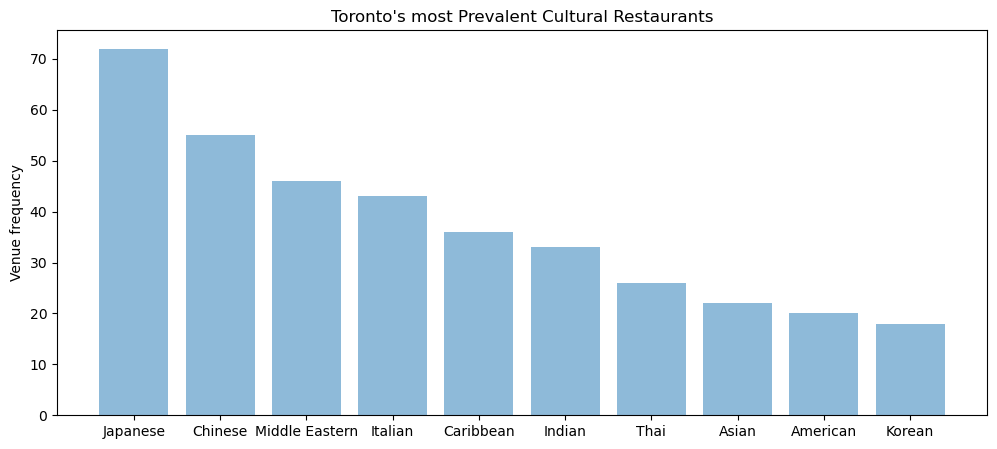

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,5))

y_pos = np.arange(len(catagory_names))

plt.bar(y_pos, catagory_freq, align='center', alpha=0.5)

plt.xticks(y_pos, catagory_names)
plt.ylabel('Venue frequency')
plt.title("Toronto's most Prevalent Cultural Restaurants")

plt.show()


### Prepare for clustering

In [20]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# Move Neighbourhood column to first index
first_col = toronto_venues.get('Neighborhood')
#toronto_onehot = toronto_onehot.drop(columns=['Neighbourhood'])
toronto_onehot.insert(0, 'Neighbourhood', first_col)

toronto_onehot.head()

,Neighbourhood,Afghan,African,American,Asian,Cantonese,Caribbean,Chinese,European,Filipino,French,Greek,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Portuguese,South American,Spanish,Thai,Turkish,Vietnamese
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Victoria Village,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Victoria Village,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Victoria Village,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Display top 3 restaurants in each neighbourhood

In [21]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

In [22]:
num_top_venues = 3

for hood in toronto_grouped['Neighbourhood']:
    print(hood)
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp = temp[temp['freq'] > 0] #remove rows where freq = 0
    temp['freq'] = temp['freq'].astype(float) #convert to float
    temp = temp.round({'freq': 2}) #round to 2 decimals
    print(temp.loc[(temp!=0).any(axis=1)].sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Agincourt
       venue  freq
0    Chinese  0.77
1  Cantonese  0.08
2   Japanese  0.08


Alderwood, Long Branch
      venue  freq
0     Asian  0.25
1  American  0.12
2   Chinese  0.12


Bathurst Manor, Wilson Heights, Downsview North
            venue  freq
0  Middle Eastern  0.50
1          Korean  0.25
2   Mediterranean  0.25


Bayview Village
   venue  freq
0  Asian   1.0


Bedford Park, Lawrence Manor East
       venue  freq
0   Japanese  0.27
1    Italian  0.18
2  Caribbean  0.09


Berczy Park
      venue  freq
0  European  0.25
1    Indian  0.25
2   Italian  0.25


Birch Cliff, Cliffside West
      venue  freq
0  Japanese   1.0


Brockton, Parkdale Village, Exhibition Place
     venue  freq
0   French   0.5
1  Spanish   0.5


Business reply mail Processing Centre, South Central Letter Processing Plant Toronto
           venue  freq
0       Japanese  0.33
1        Mexican  0.33
2  Mediterranean  0.17


CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, Sou

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


Create a dataframe containing the top N most frequent restaurant types for each neighbourhood

In [24]:
import numpy as np # library to handle data in a vectorized manner

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agincourt,Chinese,Vietnamese,Cantonese
1,"Alderwood, Long Branch",Asian,Indian,Thai
2,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern,Mediterranean,Korean
3,Bayview Village,Asian,Vietnamese,Turkish
4,"Bedford Park, Lawrence Manor East",Japanese,Italian,Filipino


### Clustering resturants by neighbourhood

Finding optimal K value

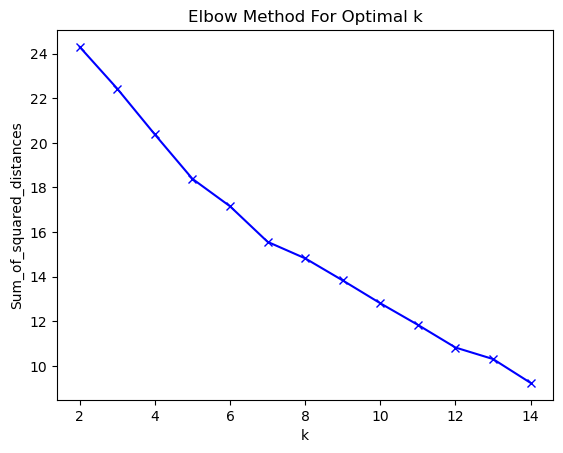

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia=[]

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,15), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


It seems like there is an elbow at k=7

In [26]:
# set number of clusters
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 


array([0, 2, 6, 2, 2, 2, 5, 3, 5, 2, 2, 5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 1,
       2, 5, 2, 6, 2, 0, 2, 2, 3, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 5,
       2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 6, 2, 6, 2, 0, 5,
       2, 2, 2, 6, 2, 3, 6, 2, 2, 2, 6, 2, 1, 6, 4, 5, 2, 5, 4],
      dtype=int32)

Append cluster labels to dataframe

In [27]:
# add clustering labels
Neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_locations

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each Neighbourhood
toronto_merged = toronto_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged = toronto_merged.dropna()
toronto_merged # check the last columns!


,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,,,,,
M4A,North York,Victoria Village,43.73057,-79.31306,2.0,Asian,Portuguese,European
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,2.0,Japanese,Thai,Mediterranean
M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,2.0,American,Japanese,Asian
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188,2.0,Italian,Japanese,Vietnamese
M3B,North York,Don Mills,43.74923,-79.36186,2.0,Japanese,Indian,South American
M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192,2.0,Indian,American,Asian
M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,2.0,Japanese,Thai,Spanish
M6B,North York,Glencairn,43.70687,-79.44812,2.0,South American,Japanese,Italian
M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.65034,-79.55362,6.0,Middle Eastern,Chinese,Filipino


### Examining Clusters

Lets compare the venues that stand out in each cluster and label them accordingly

#### Cluster 0

In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M9C,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",Chinese,Vietnamese,Turkish
M2H,Hillcrest Village,Chinese,Japanese,Vietnamese
M5J,"Harbourfront East, Union Station, Toronto Islands",Chinese,Japanese,Vietnamese
M1L,"Golden Mile, Clairlea, Oakridge",Indian,Chinese,Turkish
M1S,Agincourt,Chinese,Vietnamese,Cantonese
M5T,"Kensington Market, Chinatown, Grange Park",Chinese,Japanese,Cantonese
M1W,"Steeles West, L'Amoreaux West",Chinese,Indian,Middle Eastern


Cluster 0 is definedmainly by Chinese venues

#### Cluster 1

In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M9L,Humber Summit,Caribbean,Italian,Vietnamese
M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Caribbean,Vietnamese,Turkish
M6N,"Runnymede, The Junction North",Caribbean,Vietnamese,Turkish
M9N,Weston,Caribbean,Afghan,Thai


Cluster 1 is defined mainly by Caribbean venues

#### Cluster 2

In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M4A,Victoria Village,Asian,Portuguese,European
M5A,"Regent Park, Harbourfront",Japanese,Thai,Mediterranean
M6A,"Lawrence Manor, Lawrence Heights",American,Japanese,Asian
M7A,"Queen's Park, Ontario Provincial Government",Italian,Japanese,Vietnamese
M3B,Don Mills,Japanese,Indian,South American
M4B,"Parkview Hill, Woodbine Gardens",Indian,American,Asian
M5B,"Garden District, Ryerson",Japanese,Thai,Spanish
M6B,Glencairn,South American,Japanese,Italian
M3C,Don Mills,Japanese,Indian,South American


Cluster 2 is has no clear defining features, as the venues appear to be very mixed

#### Cluster 3

In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M6K,"Brockton, Parkdale Village, Exhibition Place",Spanish,French,Vietnamese
M5P,"Forest Hill North & West, Forest Hill Road Park",French,Vietnamese,Turkish
M8X,"The Kingsway, Montgomery Road, Old Mill North",Spanish,Vietnamese,Greek


Cluster 3 is defined by Spanish and Vietnaese venues

#### Cluster 4

In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M6G,Christie,Korean,Vietnamese,African
M2M,"Willowdale, Newtonbrook",Korean,Middle Eastern,Chinese
M2P,York Mills West,Korean,Vietnamese,Greek


Cluster 4 is defined by Korean venues

#### Cluster 5

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M4C,Woodbine Heights,Middle Eastern,Japanese,Greek
M4G,Leaside,Japanese,American,Middle Eastern
M1N,"Birch Cliff, Cliffside West",Japanese,Vietnamese,Greek
M2N,"Willowdale, Willowdale East",Japanese,Middle Eastern,Mexican
M1P,"Dorset Park, Wexford Heights, Scarborough Town...",Asian,Japanese,Vietnamese
M7R,Canada Post Gateway Processing Centre,Mexican,Japanese,Thai
M1V,"Milliken, Agincourt North, Steeles East, L'Amo...",Japanese,Vietnamese,Greek
M8V,"New Toronto, Mimico South, Humber Bay Shores",Asian,Japanese,Vietnamese
M5W,Stn A PO Boxes,Mexican,Japanese,Thai


Cluster 5 is defined by Japanese venues

#### Cluster 6

In [34]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Postal Code,,,,
M9B,"West Deane Park, Princess Gardens, Martin Grov...",Middle Eastern,Chinese,Filipino
M5C,St. James Town,Middle Eastern,American,Japanese
M4E,The Beaches,Asian,Middle Eastern,Vietnamese
M3H,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern,Mediterranean,Korean
M4H,Thorncliffe Park,Indian,Middle Eastern,African
M6H,"Dufferin, Dovercourt Village",Middle Eastern,Vietnamese,Portuguese
M1J,Scarborough Village,Indian,Middle Eastern,Greek
M1R,"Wexford, Maryvale",Middle Eastern,Vietnamese,Greek


Cluster 6 is defined by Middle Eastern venues

### Visualizing Clusters

Lets enumerate the clusters

In [35]:
from enum import Enum
class ClusterNames(Enum):
    Chinese = 0
    Caribbean = 1
    Mixed = 2
    Spanish_Vietnaese = 3
    Korean = 4
    Japanese = 5
    Middle_Eastern = 6

Create interactive map

In [43]:
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment if not installed
import folium # map rendering library
from folium.plugins import FloatImage

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
#location = geolocator.geocode(address)
latitude = 43.71458000000007
longitude = -79.40667999999994

#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = [ 'aqua', 'teal', 'red', 'gold', 'navy', 'violet', 'lime']

rainbow = [colors.rgb2hex(i) for i in colors_array]

image_file = 'https://github.com/Ayy753/Coursera_Capstone/blob/main/legend.png?raw=true'
FloatImage(image_file, bottom=2, left=72).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + ClusterNames(cluster).name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters